<h1> NumMobility </h1>
<h2> Temporal and Spatial Feature Comparisons </h2>

<p align='justify'>
    This Jupyter Notebook compares temporal and spatial features of NumMobility
    with some of the popular libraries with similar features. The main aim of
    this comparison is to show that with increase in the number of trajectory
    ids, NumMobility's use of parallelization makes it faster compared to its
    contemporary libraries. The time increase in other librarires is linear
    which makes them slower as can be seen from the plot.
</p>

<hr>

<p align='justify'>
In this Jupyter Notebook containing comparisons, the following
datasets are used:
    <ul>
        <li> <a href="https://github.com/YakshHaranwala/NumMobility/blob/main/examples/data/geolife_sample.csv"> Geolife Sample </a> </li>
        <li> <a href="https://github.com/YakshHaranwala/NumMobility/blob/main/examples/data/gulls.csv"> Seagulls Dataset </a> </li>
        <li> <a href="https://github.com/YakshHaranwala/NumMobility/blob/main/examples/data/atlantic.csv"> Hurricane Dataset </a> </li>
    </ul>
</p>

<hr>
<p align='justify'>
Note: Viewing this notebook in GitHub will not render JavaScript
elements. Hence, for a better experience, click the link below
to open the Jupyter notebook in NB viewer.

<span> &#8618; </span>
<a href="https://nbviewer.jupyter.org/github/YakshHaranwala/NumMobility/blob/main/examples/6.%20PyMove_Comparisons.ipynb" target='_blank'> Click Here </a>
</p>
</html>

In [1]:
# Importing all the necessary NumMobility modules as
# well as all other libraries that are to be compared.

from core.TrajectoryDF import NumPandasTraj as TrajDF
from utilities.conversions import Conversions as con
import pandas as pd
from time import time
from features.temporal_features import TemporalFeatures as temporal
from features.spatial_features import SpatialFeatures as spatial
import pymove as pm
ids_ = [2, 126, 1814]
print(ids_)
np_times = []
pm_times = []

[2, 126, 1814]


In [2]:
"""
    First of all, lets import all the datasets one by one
    and check out a few of their points and plot the
    dataframe.
"""

# Reading the gulls dataset and converting to NumPandasTraj.
# Also, lets, print the first 5 points of the dataset to
# see how the dataframe looks.
gulls = pd.read_csv('./data/gulls.csv')
np_gulls = TrajDF(gulls,
                latitude='location-lat',
                longitude='location-long',
                datetime='timestamp',
                traj_id='tag-local-identifier',
                rest_of_columns=[])
np_gulls.head()

event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...

In [3]:
"""
    1. Reading the atlantic dataset, cleaning it up and then
       converting it to NumPandasTraj.
    2. It is to be noted that apart from reading the dataset,
       before converting to NumPandasTraj, the dataframe needs
       some cleanup as the Time format provided in the dataframe
       needs to be first converted into a library supported time
       format. Also, the format of the coordinates need to be
       converted to library supported format before converting'
       it to NumPandasTraj.
    3. Also, lets, print the first 5 points of the dataset to
      see how the dataframe looks.
"""
atlantic = pd.read_csv('./data/atlantic.csv')
atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
np_atlantic = TrajDF(atlantic,
                latitude='Latitude',
                longitude='Longitude',
                datetime='DateTime',
                traj_id='ID',
                rest_of_columns=[])
np_atlantic.head()

Name      Date  Time Event  \
traj_id  DateTime                                                         
AL011851 1851-06-25 00:00:00              UNNAMED  18510625     0         
         1851-06-25 06:00:00              UNNAMED  18510625   600         
         1851-06-25 12:00:00              UNNAMED  18510625  1200         
         1851-06-25 18:00:00              UNNAMED  18510625  1800         
         1851-06-25 21:00:00              UNNAMED  18510625  2100     L   

                             Status   lat   lon  Maximum Wind  \
traj_id  DateTime                                               
AL011851 1851-06-25 00:00:00     HU  28.0 -94.8            80   
         1851-06-25 06:00:00     HU  28.0 -95.4            80   
         1851-06-25 12:00:00     HU  28.0 -96.0            80   
         1851-06-25 18:00:00     HU  28.1 -96.5            80   
         1851-06-25 21:00:00     HU  28.2 -96.8            80   

                              Minimum Pressure  Low Wind NE  ...  Low Wind SW  \
traj_id  DateTime                                            ...                
AL011851 1851-06-25 00:00:00              -999         -999  ...         -999   
         1851-06-25 06:00:00              -999         -999  ...         -999   
         1851-06-25 12:00:00              -999         -999  ...         -999   
         1851-06-25 18:00:00              -999         -999  ...         -999   
         1851-06-25 21:00:00              -999         -999  ...         -999   

                              Low Wind NW  Moderate Wind NE  Moderate Wind SE  \
traj_id  DateTime                                                               
AL011851 1851-06-25 00:00:00         -999              -999              -999   
         1851-06-25 06:00:00         -999              -999              -999   
         1851-06-25 12:00:00         -999              -999              -999   
         1851-06-25 18:00:00         -999              -999              -999   
         1851-06-25 21:00:00         -999              -999              -999   

                              Moderate Wind SW  Moderate Wind NW  \
traj_id  DateTime                                                  
AL011851 1851-06-25 00:00:00              -999              -999   
         1851-06-25 06:00:00              -999              -999   
         1851-06-25 12:00:00              -999              -999   
         1851-06-25 18:00:00              -999              -999   
         1851-06-25 21:00:00              -999              -999   

                              High Wind NE  High Wind SE  High Wind SW  \
traj_id  DateTime                                                        
AL011851 1851-06-25 00:00:00          -999          -999          -999   
         1851-06-25 06:00:00          -999          -999          -999   
         1851-06-25 12:00:00          -999          -999          -999   
         1851-06-25 18:00:00          -999          -999          -999   
         1851-06-25 21:00:00          -999          -999          -999   

                              High Wind NW  
traj_id  DateTime                           
AL011851 1851-06-25 00:00:00          -999  
         1851-06-25 06:00:00          -999  
         1851-06-25 12:00:00          -999  
         1851-06-25 18:00:00          -999  
         1851-06-25 21:00:00          -999  

[5 rows x 21 columns]

In [4]:
# Reading the geolife dataset and converting to NumPandasTraj.
# Also, lets, print the first 5 points of the dataset to
# see how the dataframe looks.
geolife = pd.read_csv('./data/geolife_sample.csv')
np_geolife = TrajDF(geolife,'lat','lon','datetime','id')
np_geolife.head()

lat         lon
traj_id DateTime                                  
1       2008-10-23 05:53:11  39.984224  116.319402
        2008-10-23 05:53:16  39.984211  116.319389
        2008-10-23 05:53:21  39.984217  116.319422
        2008-10-23 05:53:23  39.984710  116.319865
        2008-10-23 05:53:28  39.984674  116.319810

In [5]:
# Importing PyMove dataframes and then checking out
# their heads.

pm_gulls = pm.PandasMoveDataFrame(data=gulls,
                                  latitude='location-lat',
                                  longitude='location-long',
                                  datetime='timestamp',
                                  traj_id='tag-local-identifier')
pm_gulls.head()

,event-id,visible,datetime,lon,lat,sensor-type,individual-taxon-canonical-name,id,individual-local-identifier,study-name
0,1082620685,True,2009-05-27 14:00:00,24.58617,61.24783,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...
1,1082620686,True,2009-05-27 20:00:00,24.58217,61.23267,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...
2,1082620687,True,2009-05-28 05:00:00,24.53133,61.18833,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...
3,1082620688,True,2009-05-28 08:00:00,24.58200,61.23283,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...
4,1082620689,True,2009-05-28 14:00:00,24.58250,61.23267,gps,Larus fuscus,91732,91732A,Navigation experiments in lesser black-backed ...


In [6]:
pm_atlantic = pm.PandasMoveDataFrame(data=atlantic,
                                     latitude='Latitude',
                                     longitude='Longitude',
                                     datetime='DateTime',
                                     traj_id='ID')
pm_atlantic.head()

,id,Name,Date,Time,Event,Status,lat,lon,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,datetime
0,AL011851,UNNAMED,18510625,0,,HU,28.0,-94.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 00:00:00
1,AL011851,UNNAMED,18510625,600,,HU,28.0,-95.4,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 06:00:00
2,AL011851,UNNAMED,18510625,1200,,HU,28.0,-96.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 12:00:00
3,AL011851,UNNAMED,18510625,1800,,HU,28.1,-96.5,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 18:00:00
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2,-96.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851-06-25 21:00:00


In [7]:
pm_geolife = pm.PandasMoveDataFrame(geolife,'lat','lon','datetime','id')
pm_geolife.head()

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 16:53:05,1
1,39.984198,116.319322,2008-10-23 16:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1


In [8]:
"""
    PyMove:
        1. generate_date_features()
        2. generate_day_of_the_week_features()
        3. generate_weekend_features()
        4. generate_time_of_day_features()

    Notes while comparing:
        1. Each function is to be run 20 times at least
           while comparing to get a good average.
        2. We have to plot a graph because we have to show
           that when we have more number of ids_, we use
           more processors and it makes the code run faster.
           (What graph can be plot?)
"""

'\n    PyMove:\n        1. generate_date_features()\n        2. generate_day_of_the_week_features()\n        3. generate_weekend_features()\n        4. generate_time_of_day_features()\n\n    Notes while comparing:\n        1. Each function is to be run 20 times at least\n           while comparing to get a good average.\n        2. We have to plot a graph because we have to show\n           that when we have more number of ids_, we use\n           more processors and it makes the code run faster.\n           (What graph can be plot?)\n'

In [9]:
%%time
# First, running all the Temporal functions from NumMobility
# 20 times in order to get a good average on the seagulls dataset.

"""
    NOTE: The time overhead of converting to NumPandasTraj everytime
          while generating a Temporal feature can be handled if
          we move the methods from a separate module to the original
          DF module which will cut it short to about 1/3rd of the
          current execution time. So the question is, should we
          do it?

    NOTE: Why are we not using other datasets for comparison of
          temporal features?
    Ans: Since all the temporal features have no parallelization
         in them, it is not worthwhile comparing the other datasets
         as the execution times will be similar to all other
         libraries that are out there.
"""

for i in range(20):
    np_gulls_t1 = temporal.create_date_column(np_gulls)
    np_gulls_t1 = temporal.create_time_of_day_column(np_gulls_t1)
    np_gulls_t1 = temporal.create_weekend_indicator_column(np_gulls_t1)
    np_gulls_t1 = temporal.create_day_of_week_column(np_gulls_t1)


CPU times: user 7.89 s, sys: 172 ms, total: 8.06 s
Wall time: 8.07 s


In [10]:
%%time
# Now, running all the temporal features from PyMove 20 times
# in order to get a good average on the seagulls dataset.

#NOTE: IT IS TO BE NOTED THAT FOR PyMove, THE TIME FEATURES
#      GENERATION IS NOT CONSISTENT AS IT WORKS FOR SOME
#      DATASETS AND DOESN'T WORK FOR OTHERS. IT FAILS WHEN
#      THE NUMBER OF TRAJECTORY IDs IN A DATASET IS
#      CONSIDERABLY HIGHER.

for i in range(20):

    pm_gulls.generate_date_features(inplace=True)
    pm_gulls.generate_weekend_features(inplace=True)
    pm_gulls.generate_day_of_the_week_features(inplace=True)
    pm_gulls.generate_time_of_day_features(inplace=True)


CPU times: user 2.95 s, sys: 176 ms, total: 3.13 s
Wall time: 3.13 s


In [11]:
# -----------------------Spatial Features------------------------ #
"""
    NumMobility
    -> create_distance_between_consecutive_column()
    -> create_distance_from_start_column()
    -> get_distance_travelled_by_date_and_traj_id()
    -> create_point_within_range_column()
    -> create_distance_from_given_point_column()
    -> create_speed_from_prev_column()
    -> create_acceleration_from_prev_column()
    -> create_jerk_from_prev_column()
    -> create_bearing_column()
    -> create_bearing_rate_column()
    -> create_rate_of_bearing_rate_column()
    -> get_distance_travelled_by_traj_id()
    -> get_number_of_locations()

    PyMove
    -> generate_dist_features()
    -> generate_speed_features()

    MovingPandas
    -> add_speed()

    TrajLib
    -> get_distance()
    -> get_speed()
    -> get_acc()
    -> get_bearing()
    -> get_jerk()
    -> get_brate()
    -> get_brrate()

"""

'\n    NumMobility\n    -> create_distance_between_consecutive_column()\n    -> create_distance_from_start_column()\n    -> get_distance_travelled_by_date_and_traj_id()\n    -> create_point_within_range_column()\n    -> create_distance_from_given_point_column()\n    -> create_speed_from_prev_column()\n    -> create_acceleration_from_prev_column()\n    -> create_jerk_from_prev_column()\n    -> create_bearing_column()\n    -> create_bearing_rate_column()\n    -> create_rate_of_bearing_rate_column()\n    -> get_distance_travelled_by_traj_id()\n    -> get_number_of_locations()\n\n    PyMove\n    -> generate_dist_features()\n    -> generate_speed_features()\n\n    MovingPandas\n    -> add_speed()\n\n    TrajLib\n    -> get_distance()\n    -> get_speed()\n    -> get_acc()\n    -> get_bearing()\n    -> get_jerk()\n    -> get_brate()\n    -> get_brrate()\n\n'

In [12]:
%%time

# For geolife dataset, here we are generating the distance
# between consecutive points of a trajectory using NumMobility.
np_gl_start = time()
for i in range(20):
    np_geolife_t1 = spatial.create_distance_between_consecutive_column(np_geolife)
    np_geolife_t1 = spatial.create_distance_from_start_column(np_geolife_t1)

np_gl_end = time()
np_times.append(np_gl_end-np_gl_start)

CPU times: user 10 s, sys: 704 ms, total: 10.7 s
Wall time: 10.7 s


In [13]:
%%time
# Similarly, we are doing the same as done above using the PyMove
# library.
pm_gl_start = time()
for i in range(20):
    pm_geolife.generate_dist_features(inplace=True)

pm_gl_end = time()
pm_times.append(pm_gl_end - pm_gl_start)

CPU times: user 3.26 s, sys: 30 ms, total: 3.29 s
Wall time: 3.24 s


In [14]:
%%time

# For seagulls dataset, here we are generating the distance
# between consecutive points of a trajectory using NumMobility.
np_gull_start = time()
for i in range(20):
    np_gulls_t2 = spatial.create_distance_between_consecutive_column(np_gulls)
    np_gulls_t2 = spatial.create_distance_from_start_column(np_gulls_t2)

np_gull_end = time()
np_times.append(np_gull_end - np_gull_start)

CPU times: user 7.89 s, sys: 2.08 s, total: 9.97 s
Wall time: 18.2 s


In [15]:
%%time

# Similarly, we are doing the same as done above using the PyMove
# library.
"""
    NOTE:
        -> PyMove generate_dist_features() creates three different
           distance columns.
"""
pm_gulls_start = time()
for i in range(20):
    pm_gulls.generate_dist_features(inplace=True)

pm_gulls_end = time()
pm_times.append(pm_gulls_end - pm_gulls_start)

CPU times: user 11.3 s, sys: 552 ms, total: 11.9 s
Wall time: 10.7 s


In [16]:
%%time

# Now, doing the same distance feature generation using NumMobility
# on the atlantic hurricane dataset. This is the place where
# NumMobility excels because NumMobility uses high degree of
# parallelization which is reflected in the execution time of
# both the libraries doing similar calculation.
np_atl_start = time()
for i in range(20):

    np_atlantic_t1 = spatial.create_distance_between_consecutive_column(np_atlantic)
    np_atlantic_t1 = spatial.create_distance_from_start_column(np_atlantic_t1)

np_atl_end = time()
np_times.append(np_atl_end - np_atl_start)

CPU times: user 13.2 s, sys: 8.86 s, total: 22.1 s
Wall time: 39.4 s


In [17]:
%%time

# Doing the same distance feature generation using PyMove Library.
# Pymove does not use parallelization, it is clearly visible
# in the execution time and it runs very slow as compared to
# NumMobility when the number of unique Trajectory IDs keep
# increasing.

pm_atl_start = time()
for i in range(20):

    pm_atlantic.generate_dist_features(inplace=True)

pm_atl_end = time()
pm_times.append(pm_atl_end - pm_atl_start)

CPU times: user 7min 59s, sys: 1.31 s, total: 8min
Wall time: 7min 57s


Text(0, 0.5, 'Time (s)')

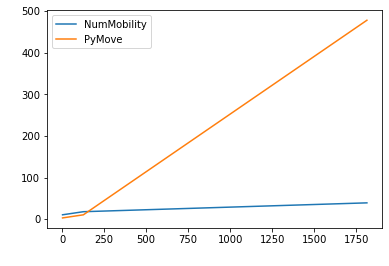

In [23]:
# Plot shows the time taken by PyMove and NumMobility to handle datasets
# with different number of trajectory ids.
import matplotlib.pyplot as plt

plt.plot(ids_, np_times),
plt.plot(ids_, pm_times)
plt.legend(['NumMobility', 'PyMove'])
plt.xlabel('Number of IDs', color='white')
plt.ylabel('Time (s)', color='white')


